## Setup

In [1]:
import sys
sys.path.append("../..")  # Adjust the path to import from the parent directory
sys.path.append("../../aspforaba")
sys.path.append("../../GradualABA")

In [2]:
from aspforaba.src.aspforaba.abaf import ABAF
import src.causal_aba.assumptions as asms
import src.causal_aba.atoms as atoms
import networkx as nx
from src.utils.utils import unique_product, powerset

from GradualABA.ABAF import ABAF as GradualABAF
from GradualABA.semantics.bsafDiscreteModular import DiscreteModular
from GradualABA.semantics.modular.LinearInfluence import LinearInfluence
from GradualABA.semantics.modular.ProductAggregation import ProductAggregation
from GradualABA.semantics.modular.SetProductAggregation import SetProductAggregation
from GradualABA.semantics.modular import SumAggregation
from GradualABA.semantics.modular.SetMinAggregation import SetMinAggregation
from GradualABA.semantics.modular import QuadraticMaximumInfluence

In [3]:
# setup the problem
import sys

sys.path.insert(0, '../../ArgCausalDisco/')
sys.path.insert(0, '../../notears/')

import time
from pathlib import Path
from src.utils.enums import Fact, RelationEnum
from src.utils.bn_utils import get_dataset
from ArgCausalDisco.utils.helpers import random_stability
from itertools import combinations

from ArgCausalDisco.cd_algorithms.PC import pc
from ArgCausalDisco.utils.graph_utils import initial_strength


ALPHA = 0.01
INDEP_TEST = 'fisherz'

SAMPLE_SIZE = 5000
RESULT_DIR = Path("./results/")

dataset_name = 'cancer'
seed = 2024

X_s, B_true = get_dataset(dataset_name,
                        seed=seed,
                        sample_size=SAMPLE_SIZE)

# get facts from pc
uc_rule = 5
data = X_s

random_stability(seed)
n_nodes = data.shape[1]
cg = pc(data=data, alpha=ALPHA, indep_test=INDEP_TEST, uc_rule=uc_rule,
        stable=True, show_progress=True, verbose=True)
facts = []

for node1, node2 in combinations(range(n_nodes), 2):
    test_PC = [t for t in cg.sepset[node1, node2]]
    for sep_set, p in test_PC:
        dep_type_PC = "indep" if p > ALPHA else "dep"
        init_strength_value = initial_strength(p, len(sep_set), ALPHA, 0.5, n_nodes)

        fact = Fact(
            relation=RelationEnum(dep_type_PC),
            node1=node1,
            node2=node2,
            node_set=set(sep_set),
            score=init_strength_value
        )

        if fact not in facts:
            facts.append(fact)
sorted_facts = sorted(facts, key=lambda x: x.score, reverse=True)


/opt/homebrew/Caskroom/miniconda/base/envs/aba-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:root:You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
INFO:root:You are using ``pytorch`` as the backend.
INFO:root:==================Loading cancer dataset==================
Generating for node: Dyspnoea: 100%|██████████| 5/5 [00:00<00:00, 432.57it/s]
INFO:root:Data shape: (5000, 5)
INFO:root:Number of true edges: 4
INFO:root:True BN edges: [('Pollution', 'Cancer'), ('Smoker', 'Cancer'), ('Cancer', 'Xray'), ('Cancer', 'Dyspnoea')]
INFO:root:DAG? True
INFO:root:True DAG shape: (5, 5), True DAG edges: 4
INFO:root:           Cancer  Dyspnoea  Pollution  Smoker  Xray
Cancer          0         1          0       0     1
Dyspnoea        0         0         

## Gradual ABA with More Rules

In [4]:
from src.gradual.run import run_get_bsaf, run_model
from src.gradual.extra.abaf_factory_v1 import FactoryV1
from src.gradual.model_wrapper import ModelEnum

In [5]:
factory = FactoryV1(n_nodes=X_s.shape[1])

In [6]:
bsaf = run_get_bsaf(factory=factory,
                    facts=sorted_facts)

Building arguments: 100%|██████████| 1390/1390 [00:02<00:00, 497.13it/s]

[2025-07-11 10:01:18] INFO - app - Pruning supersets from derivations



INFO:app:Pruning supersets from derivations


In [7]:
output = run_model(n_nodes=X_s.shape[1],
                   bsaf=bsaf,
                   model_name=None,
                   set_aggregation=SetProductAggregation(),
                   aggregation=SumAggregation(),
                   influence=QuadraticMaximumInfluence(conservativeness=10))


[2025-07-11 10:01:19] INFO - app - solving BSAF with GradualCausalABA


INFO:app:solving BSAF with GradualCausalABA



Discrete modular, iterations:  10 
-------
Aggregation:  SumAggregation
Influence:  QuadraticMaximumInfluence
Set Aggregation:  SetProductAggregation
-------

iter	active_path_0_1__0__	 active_path_0_1__0__2	 active_path_0_1__0__2_3	 active_path_0_1__0__2_3_4	 active_path_0_1__0__2_4	 active_path_0_1__0__3	 active_path_0_1__0__3_4	 active_path_0_1__0__4	 active_path_0_1__10__	 active_path_0_1__10__2	 active_path_0_1__10__2_3	 active_path_0_1__10__2_3_4	 active_path_0_1__10__2_4	 active_path_0_1__10__3	 active_path_0_1__10__3_4	 active_path_0_1__10__4	 active_path_0_1__11__	 active_path_0_1__11__2	 active_path_0_1__11__2_3	 active_path_0_1__11__2_3_4	 active_path_0_1__11__2_4	 active_path_0_1__11__3	 active_path_0_1__11__3_4	 active_path_0_1__11__4	 active_path_0_1__12__	 active_path_0_1__12__2	 active_path_0_1__12__2_3	 active_path_0_1__12__2_3_4	 active_path_0_1__12__2_4	 active_path_0_1__12__3	 active_path_0_1__12__3_4	 active_path_0_1__12__4	 active_path_0_1__13__	 active_path_0_1_

In [8]:
{asm: (vals[0][-1], vals[-1][-1]) for asm, vals in output.graph_data.items() 
 if asm.startswith('indep')}

{'indep_0_3__4': (np.float64(0.1250000001038003),
  np.float64(0.06669729482276407)),
 'indep_1_3__2_4': (0.5, np.float64(0.2985694593459953)),
 'indep_1_4__3': (0.5, np.float64(0.2722770923237164)),
 'indep_1_4__': (np.float64(0.7599053201175792),
  np.float64(0.38797657531532365)),
 'indep_2_4__': (np.float64(0.8584048027387069),
  np.float64(0.43934826075149314)),
 'indep_2_3__0_4': (0.5, np.float64(0.29858413750717505)),
 'indep_1_2__3': (0.5, np.float64(0.2746814431698051)),
 'indep_1_3__0': (np.float64(0.7282510623312446),
  np.float64(0.3931930602926585)),
 'indep_0_1__3_4': (np.float64(0.2500000047751053),
  np.float64(0.14880296007577232)),
 'indep_2_3__': (np.float64(0.8580547981458797),
  np.float64(0.4391943890654069)),
 'indep_1_3__2': (0.5, np.float64(0.27467191860187357)),
 'indep_3_4__1_2': (0.5, np.float64(0.29857363469355497)),
 'indep_2_3__4': (0.5, np.float64(0.26514320949723114)),
 'indep_0_4__2_3': (np.float64(0.25), np.float64(0.1488090478065936)),
 'indep_3_4__0

In [9]:
{asm: vals[-1][-1] for asm, vals in output.graph_data.items() 
 if asm.startswith('arr')}

{'arr_2_1': np.float64(0.9886548121208205),
 'arr_4_1': np.float64(0.9863576067216795),
 'arr_2_4': np.float64(0.9889781733258136),
 'arr_4_2': np.float64(0.9886754860386111),
 'arr_0_4': np.float64(0.9863751798225512),
 'arr_0_2': np.float64(0.9886286408563659),
 'arr_3_0': np.float64(0.9878969471674495),
 'arr_3_1': np.float64(0.9864327218463325),
 'arr_4_3': np.float64(0.9889971453270345),
 'arr_1_4': np.float64(0.9863623140180837),
 'arr_2_0': np.float64(0.9878774566791668),
 'arr_1_2': np.float64(0.9886573556207277),
 'arr_4_0': np.float64(0.9878367450352741),
 'arr_0_3': np.float64(0.9889519391747826),
 'arr_0_1': np.float64(0.9879382918795159),
 'arr_1_0': np.float64(0.9878582122104816),
 'arr_1_3': np.float64(0.9889430633068839),
 'arr_3_4': np.float64(0.9889964038149013),
 'arr_3_2': np.float64(0.9886176391725616),
 'arr_2_3': np.float64(0.9864112615845111)}

In [10]:
{asm: vals[-1][-1] for asm, vals in output.graph_data.items() 
 if asm.startswith('noe')}

{'noe_1_4': np.float64(0.5016869995768712),
 'noe_0_4': np.float64(0.49404241253495457),
 'noe_0_2': np.float64(0.49400917171275677),
 'noe_1_3': np.float64(0.5015300209647822),
 'noe_0_3': np.float64(0.4940144618511942),
 'noe_0_1': np.float64(0.49405273334848965),
 'noe_1_2': np.float64(0.5024185224806159),
 'noe_2_3': np.float64(0.5016154096312371),
 'noe_3_4': np.float64(0.5020660624006323),
 'noe_2_4': np.float64(0.501936723307496)}

In [11]:
from matplotlib import pyplot as plt

def strengthplot(
    graph_data,
    title="Untitled graph",
    wide=6,
    tall=4,
    cmap='turbo',
    dpi=90,
    linewidth_pt=1,
    alpha=0.5
):
   
    fig, ax = plt.subplots(figsize=(wide, tall), dpi=dpi)
 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    cmap = plt.get_cmap(cmap)

    for name, seq in graph_data.items():
        xs = [t for (t, _) in seq]
        ys = [v for (_, v) in seq]
        color = cmap(ys[-1])
        ax.plot(xs, ys, label=name, color=color, alpha=alpha, linewidth=linewidth_pt)

    ax.set_xlabel("Time (t)")
    ax.set_ylabel("Strength (t)")
    ax.set_title(title)

    ax.grid()
    return plt


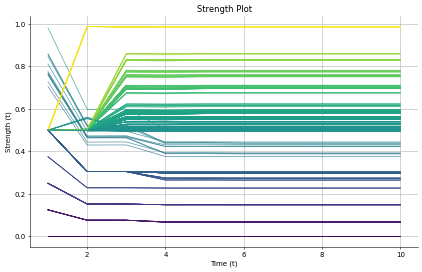

In [26]:
strengthplot(    graph_data=output.graph_data,
    title="Strength Plot",
    wide=10,
    tall=6,
    cmap='viridis',
    dpi=50,
    linewidth_pt=1,
    alpha=0.8
).show()

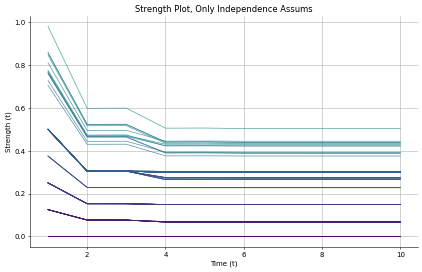

In [27]:
strengthplot(    graph_data={assum: series for assum, series in output.graph_data.items() if assum.startswith('indep')},
    title="Strength Plot, Only Independence Assums",
    wide=10,
    tall=6,
    cmap='viridis',
    dpi=50,
    linewidth_pt=1,
    alpha=0.8
).show()

## Confirming that ranking changes

In [18]:
# select independence assumptions with strengths other than 0.5
indep_assums = {assum: series for assum, series in output.graph_data.items() if assum.startswith('indep') and series[0][-1] != 0.5}
len(indep_assums)  # must be equal to number of facts

44

In [19]:
ranking_initial = sorted(indep_assums.items(), key=lambda x: (x[1][0][1], x[0]), reverse=True)
ranking_after= sorted(indep_assums.items(), key=lambda x: (x[1][-1][1], x[0]), reverse=True)



In [21]:
ranking_initial == ranking_after

False

In [24]:
[a[0] for a in ranking_initial]

['indep_1_2__',
 'indep_2_4__',
 'indep_2_3__',
 'indep_3_4__',
 'indep_3_4__0',
 'indep_1_2__0',
 'indep_1_4__0',
 'indep_2_4__0',
 'indep_1_3__',
 'indep_1_4__',
 'indep_1_3__0',
 'indep_2_3__0',
 'indep_0_1__2_3_4',
 'indep_0_3__1_2_4',
 'indep_0_4__1_2_3',
 'indep_0_2__1_3_4',
 'indep_0_1__3_4',
 'indep_0_1__2_4',
 'indep_0_1__2_3',
 'indep_0_3__1_4',
 'indep_0_3__1_2',
 'indep_0_3__2_4',
 'indep_0_4__2_3',
 'indep_0_4__1_3',
 'indep_0_4__1_2',
 'indep_0_2__3_4',
 'indep_0_2__1_4',
 'indep_0_2__1_3',
 'indep_0_1__4',
 'indep_0_1__3',
 'indep_0_1__2',
 'indep_0_3__1',
 'indep_0_3__4',
 'indep_0_3__2',
 'indep_0_4__3',
 'indep_0_4__2',
 'indep_0_4__1',
 'indep_0_2__4',
 'indep_0_2__3',
 'indep_0_2__1',
 'indep_0_1__',
 'indep_0_3__',
 'indep_0_4__',
 'indep_0_2__']

In [25]:
[a[0] for a in ranking_after]

['indep_1_2__',
 'indep_3_4__0',
 'indep_2_4__',
 'indep_2_3__',
 'indep_3_4__',
 'indep_1_4__0',
 'indep_2_4__0',
 'indep_1_2__0',
 'indep_1_3__0',
 'indep_1_3__',
 'indep_1_4__',
 'indep_2_3__0',
 'indep_0_2__1_3_4',
 'indep_0_3__1_2_4',
 'indep_0_4__1_2_3',
 'indep_0_1__2_3_4',
 'indep_0_2__1_4',
 'indep_0_3__1_4',
 'indep_0_1__2_3',
 'indep_0_2__1_3',
 'indep_0_4__2_3',
 'indep_0_3__2_4',
 'indep_0_3__1_2',
 'indep_0_4__1_3',
 'indep_0_2__3_4',
 'indep_0_1__3_4',
 'indep_0_4__1_2',
 'indep_0_1__2_4',
 'indep_0_3__2',
 'indep_0_4__1',
 'indep_0_1__3',
 'indep_0_1__4',
 'indep_0_2__1',
 'indep_0_2__4',
 'indep_0_2__3',
 'indep_0_1__2',
 'indep_0_3__1',
 'indep_0_3__4',
 'indep_0_4__3',
 'indep_0_4__2',
 'indep_0_1__',
 'indep_0_3__',
 'indep_0_4__',
 'indep_0_2__']